In [ ]:
#Q1.
""" Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.
Dataset Link-

https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
https://github.com/dsrscientist/DSData

      """

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #not required as its copied

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
# Display the first few rows of the dataset
print(df.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [4]:
df.tail(10) #The tail() method returns a specified number of rows, string from the last.

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.shape # to check the dimension of the data set (rows, columns)

(158, 12)

In [6]:
df.dtypes #Checking the types of columns

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
#checking the null Values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df.info() #detailed information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [10]:
#checking number of unique value in each column
df.nunique().to_frame('no. of unique values')

,no. of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [11]:
#Checking the correlation between feature and the target. NOTE: Range is from (-1 to +1) & 0 represent no correlation
cor=df.corr()["Happiness Score"].sort_values()
cor


Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

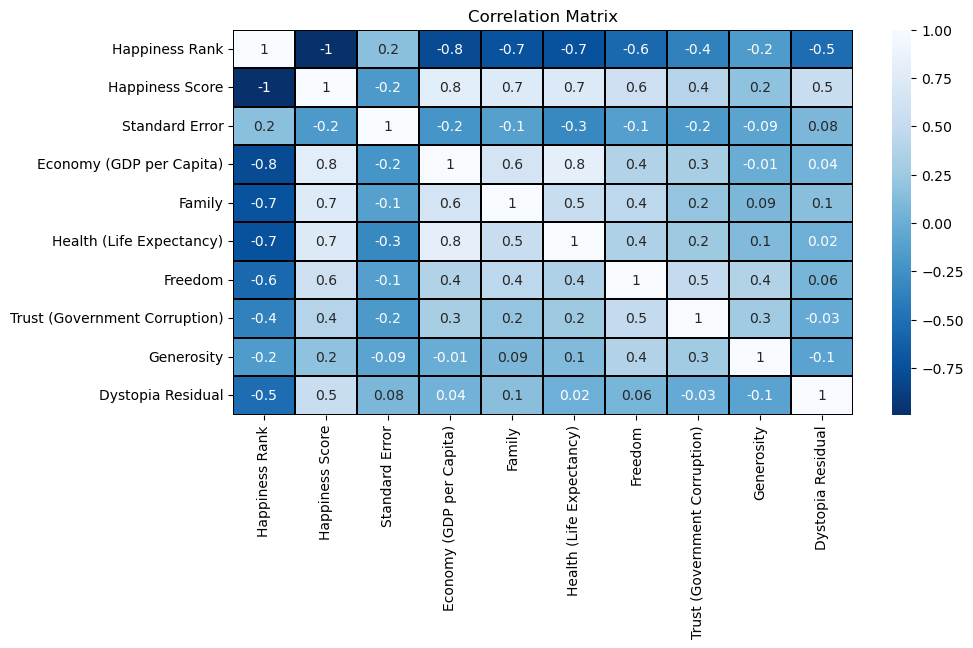

In [12]:
#Visualising the correlation matrix by plotting heat map
plt.figure(figsize=(10,5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', linecolor='black', fmt=".1g", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

# NOTE: 0- no relation, -0.3 to +0.3 - less correlation, greater than -0.5 or greater than +0.5 - moderate correlation, greater than -0.7 or greater than +0.7 high correlation

In [13]:
# Drop unnecessary columns
df = df.drop(['Country', 'Region','Happiness Rank','Dystopia Residual','Standard Error'], axis=1)

#Since the Dystopia Residual is already provided in the dataset, we can decide whether to include it as a feature in your model or not.

In [14]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


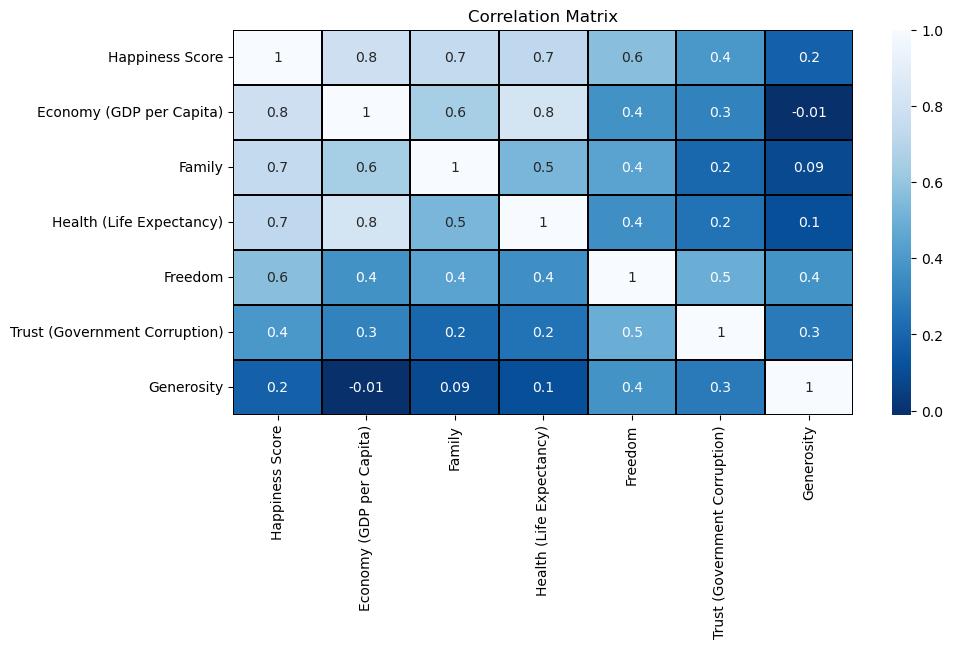

In [15]:
#Visualising the correlation matrix by plotting heat map
plt.figure(figsize=(10,5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', linecolor='black', fmt=".1g", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

# NOTE: 0- no relation, -0.3 to +0.3 - less correlation, greater than -0.5 or greater than +0.5 - moderate correlation, greater than -0.7 or greater than +0.7 high correlation

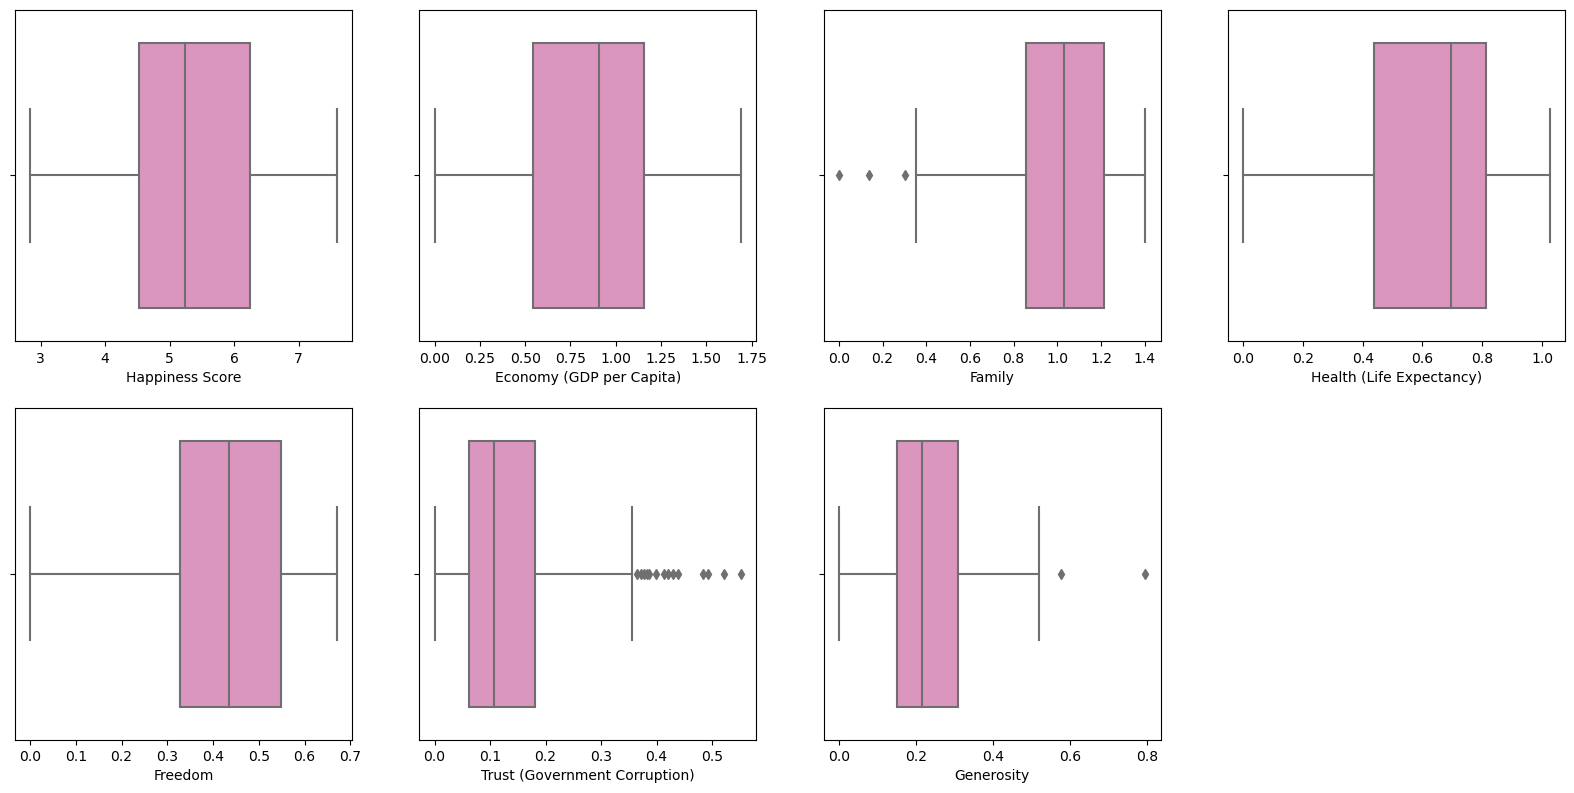

In [16]:
#lets check the outliners by plotting box plot
plt.figure(figsize = (20, 25))
p=1
for i in df:
    if p<=7:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette='Set2_r')        
        plt.xlabel(i)
        
    p+=1
    
plt.show()

In [17]:
# Removing the outliers using zscore and IQR techniques before building the model and selected best one

from scipy.stats import zscore
out_features= df[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
z=np.abs(zscore(out_features))
z

#any z-score greater than +3 or less than -3 is considered as outlier

#we donot detect outliners from target variable (Happiness Score) and catagorial column

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040
1,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856
2,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293
3,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638
4,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563
...,...,...,...,...,...,...
153,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228
154,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117
155,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891
156,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950


In [18]:
# threshold=3

np.where(z>3)

# 1st is row no. & 2nd is column no. , which are greater than 3

#we will not be reoving the outlier in this case since we have already removed 4 column from the dataframe.

(array([ 27, 128, 147, 153, 157], dtype=int64),
 array([4, 5, 1, 4, 1], dtype=int64))

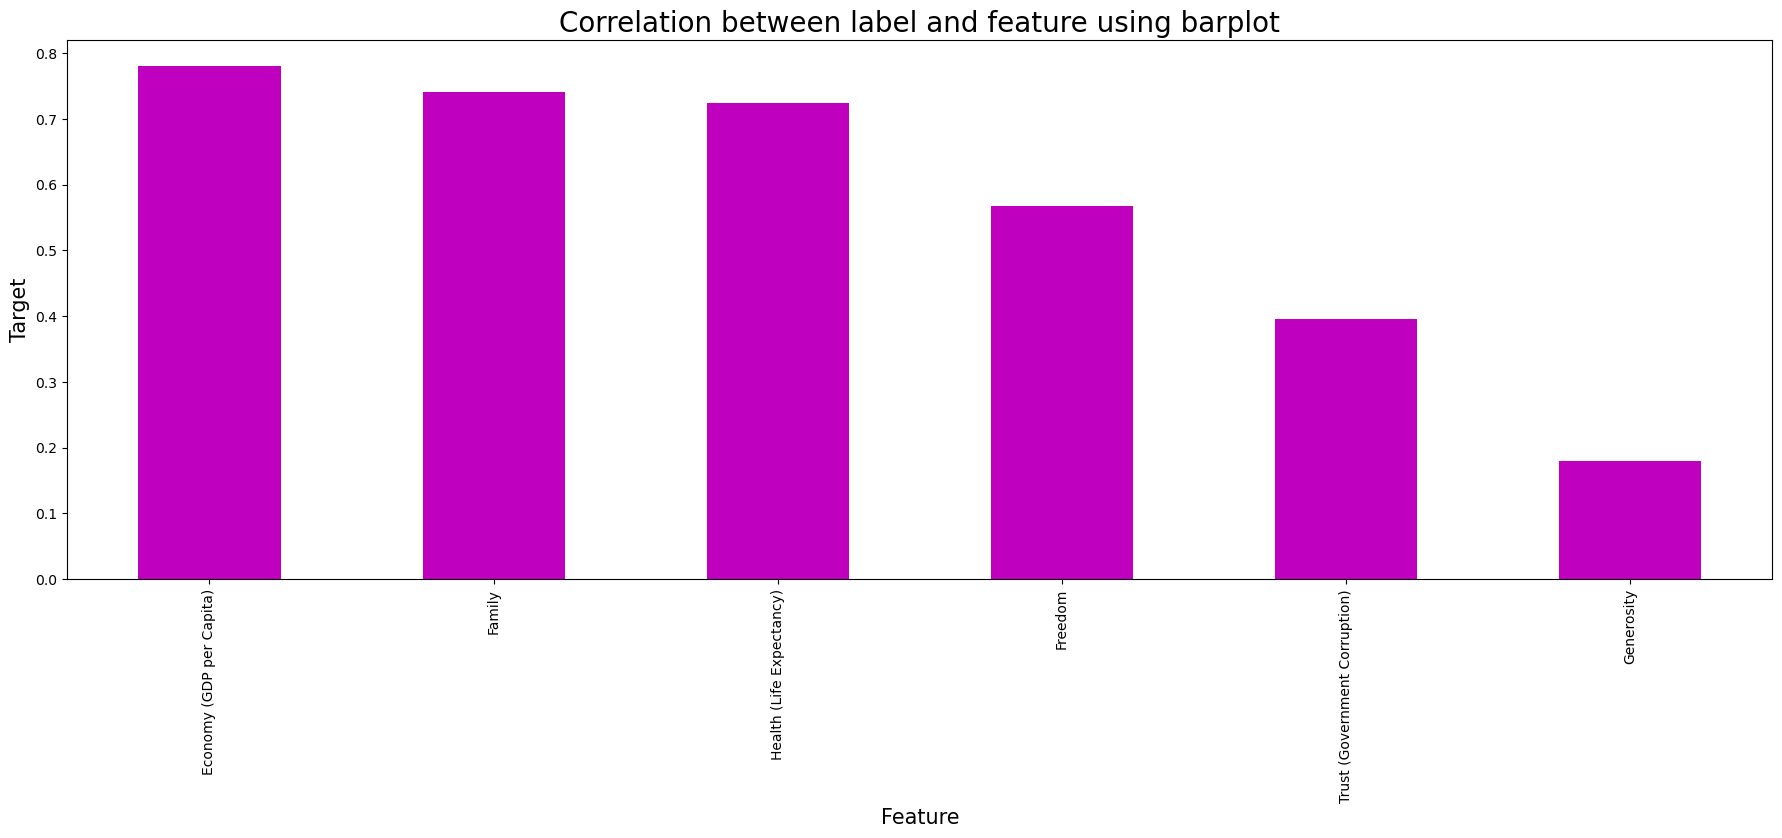

In [19]:
#Visualising the correlation between label and features using bar plot

plt.figure(figsize= (22, 7))
df.corr()['Happiness Score'].sort_values(ascending = False).drop(['Happiness Score']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and feature using barplot', fontsize=20)
plt.show()


In [ ]:
#MODELING

In [20]:
# Split the data into features (X) and target variable (y)
x = df.drop('Happiness Score', axis=1)
y = df['Happiness Score']


In [22]:
# Standardize features (only on the features not on target variable)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

# we have converted into 'pd.DataFrame' cause after applying applying StandardScaler we get output in Array format.

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040
1,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856
2,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293
3,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638
4,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563
...,...,...,...,...,...,...
153,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228
154,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117
155,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891
156,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950


In [23]:
#important necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [24]:
# Finding the best random state

maxAccu = 0
maxRS = 0

for i in range(1, 200):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    
    # Initialize Linear Regression
    lr = LinearRegression()
    
    # Train the model
    lr.fit(x_train, y_train)
    
    # Make predictions
    pred = lr.predict(x_test)
    
    # Calculate acc
    acc = r2_score(y_test, pred)
    
    # Update the best random state if the current acc is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Maximum r2 score is", maxAccu, "on Random_state", maxRS)

    


Maximum r2 score is 0.8455253648079549 on Random_state 61


In [25]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=maxRS)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge


In [27]:
# Initialize Linear Regression model
LR = LinearRegression()

# Fit the model to the training data
LR.fit(x_train, y_train)

# Make predictions on the test set
pred_LR = LR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = LR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_LR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score: 0.8455253648079549
R2_score on training data: 73.20238595761074
Mean Absolute Error: 0.3547808169110436
Mean Squared Error: 0.21965467965594532
Root Mean Squared Error: 0.4686733186943175


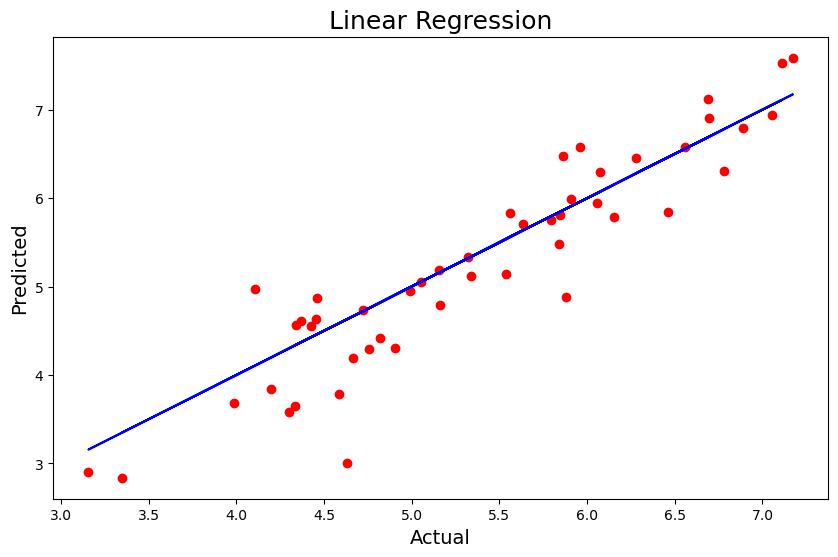

In [28]:
#scatter plot with the actual vs. predicted values for Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [29]:
# CHECKING VARIANCE INFLATION FACTOR (VIF)
#Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif value']= [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

# VIF is used to find out the multicollinearity, Two variables are considered perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences
#A VIF less than 5 indicates a low correlation of that predictor with other predictors. A value between 5 and 10 indicates a moderate correlation, while VIF values larger than 10 are a sign for high, not tolerable correlation of model predictors

,Vif value,Features
0,4.078140,Economy (GDP per Capita)
1,1.901853,Family
2,3.157655,Health (Life Expectancy)
3,1.740443,Freedom
4,1.419584,Trust (Government Corruption)
5,1.268610,Generosity


In [30]:
RFR = RandomForestRegressor()

# Fit the model to the training data
RFR.fit(x_train, y_train)

# Make predictions on the test set
pred_RFR =RFR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = RFR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_RFR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score: 0.7548747747497023
R2_score on training data: 95.67227899397437
Mean Absolute Error: 0.44666062499999987
Mean Squared Error: 0.3485549764270834
Root Mean Squared Error: 0.5903854473368084


In [31]:
knn = KNN()

# Fit the model to the training data
knn.fit(x_train, y_train)

# Make predictions on the test set
pred_knn =knn.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = knn.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_knn))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score: 0.7498252617610053
R2_score on training data: 79.07588613849636
Mean Absolute Error: 0.47203750000000005
Mean Squared Error: 0.3557351141666667
Root Mean Squared Error: 0.5964353394683004


In [32]:
GBR = GradientBoostingRegressor()

# Fit the model to the training data
GBR.fit(x_train, y_train)

# Make predictions on the test set
pred_GBR =GBR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = GBR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_GBR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score: 0.7649399284154277
R2_score on training data: 98.71710705692527
Mean Absolute Error: 0.43735980426215626
Mean Squared Error: 0.3342428655657488
Root Mean Squared Error: 0.5781374106263568


In [33]:
lasso = Lasso()

# Fit the model to the training data
lasso.fit(x_train, y_train)

# Make predictions on the test set
pred_lasso =lasso.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = lasso.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_lasso))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score: -0.025763960086554683
R2_score on training data: 0.0
Mean Absolute Error: 1.008464393939394
Mean Squared Error: 1.4585815579063361
Root Mean Squared Error: 1.2077174992134279


In [34]:
rd = Ridge()

# Fit the model to the training data
rd.fit(x_train, y_train)

# Make predictions on the test set
pred_rd =rd.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = rd.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_rd))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score: 0.8448508778064219
R2_score on training data: 73.20146875251054
Mean Absolute Error: 0.3554626883558433
Mean Squared Error: 0.2206137641429853
Root Mean Squared Error: 0.4696953950625717


In [35]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
# Fit the model to the training data
dtr.fit(x_train, y_train)

# Make predictions on the test set
pred_dtr =dtr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = dtr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_dtr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score: 0.39219777869259886
R2_score on training data: 100.0
Mean Absolute Error: 0.7151666666666666
Mean Squared Error: 0.8642622916666666
Root Mean Squared Error: 0.9296570828357447


In [36]:
from sklearn.svm import SVR

svr=SVR()
# Fit the model to the training data
svr.fit(x_train, y_train)

# Make predictions on the test set
pred_svr =svr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = svr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_svr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score: 0.7372539784326222
R2_score on training data: 83.38095982622474
Mean Absolute Error: 0.474646877449868
Mean Squared Error: 0.37361080753812
Root Mean Squared Error: 0.6112371123697579


In [37]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
# Fit the model to the training data
etr.fit(x_train, y_train)

# Make predictions on the test set
pred_etr =etr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = etr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_etr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_etr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_etr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_etr)))

R2_score: 0.7418985666146226
R2_score on training data: 100.0
Mean Absolute Error: 0.4700964583333331
Mean Squared Error: 0.36700645124375014
Root Mean Squared Error: 0.6058105737305599


In [38]:
from sklearn.model_selection import cross_val_score

In [ ]:
""" default scoring parameter in cross validation for classification models is - accuracy
default scoring parameter in cross validation for regression model is - r squared score  .
and since its a regression model we should look for r squared score """

In [39]:
#cross_val_score on the Linear regression model (to insure overfitting or not )

score= cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_LR)- score.mean())*100)

[-7.4983623  -2.89712449 -5.83004267 -8.66372007 -4.24569971]
-5.826989848235787
Difference between R2 score and cross validation score is  667.2515213043741


In [40]:
#cross_val_score on the RandomForestRegressor
score1= cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_RFR)- score1.mean())*100)

[-10.98138707  -5.19279581  -6.03104425 -11.4157221   -7.34026265]
-8.192242376170281
Difference between R2 score and cross validation score is  894.7117150919983


In [41]:
#cross_val_score on the KNN

score2= cross_val_score(knn,x,y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_knn)- score2.mean())*100)

[-13.83086175  -6.10988941  -8.89121586 -14.10586285  -6.59118346]
-9.905802667805482
Difference between R2 score and cross validation score is  1065.5627929566488


In [42]:
#cross_val_score on the GradientBoostingRegressor

score3= cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_GBR)- score3.mean())*100)

[ -9.63936939  -4.55839966  -8.52259135 -12.4923716   -7.09163405]
-8.460873209444198
Difference between R2 score and cross validation score is  922.5813137859626


In [43]:
#cross_val_score on the lasso
score4= cross_val_score(lasso,x,y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_lasso)- score4.mean())*100)

[-39.5383371  -12.7569766   -0.20386211 -30.73906532 -23.65659767]
-21.378967758942114
Difference between R2 score and cross validation score is  2135.320379885556


In [44]:
#cross_val_score on the Ridge
score5= cross_val_score(rd,x,y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_rd)- score5.mean())*100)

[-7.58317741 -2.89079462 -5.78494794 -8.59397161 -4.28879651]
-5.8283376165183824
Difference between R2 score and cross validation score is  667.3188494324804


In [45]:
#cross_val_score on the DecisionTreeRegressor
score6= cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_dtr)- score6.mean())*100)

[ -8.48142933 -17.48067591 -17.64702545 -19.88913781 -10.42485472]
-14.78462464394392
Difference between R2 score and cross validation score is  1517.682242263652


In [46]:
#cross_val_score on the SVR
score7= cross_val_score(svr,x,y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_svr)- score7.mean())*100)

[-16.62208387  -6.78985079  -7.87867493 -12.16679762  -9.0943746 ]
-10.510356361852928
Difference between R2 score and cross validation score is  1124.761034028555


In [47]:
#cross_val_score on the ExtraTreesRegressor
score8= cross_val_score(etr,x,y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_etr)- score8.mean())*100)

[-11.17003822  -6.38740598  -7.22670634 -11.66827679  -6.55011758]
-8.60050898112011
Difference between R2 score and cross validation score is  934.2407547734732


In [ ]:
#Difference between R2 score and cross validation score is coming too much may be Data Leakage, dont know how to solve this issue .

In [48]:
#GridSearchCV performs a search over the specified parameter values using cross-validation. (Gradient Boosting Regressor)

from sklearn.model_selection import GridSearchCV
# Initialize the model
GBR = GradientBoostingRegressor() #already defined above still writing to easy remember

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
gscv = GridSearchCV(estimator=GBR, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [49]:
gscv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [50]:
# Get the best parameters and best model
best_params = gscv.best_params_
best_model = gscv.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 0.34588497860367506
R-squared: 0.7567524808854449


In [51]:
from sklearn.ensemble import GradientBoostingRegressor

Model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,subsample=1.0,random_state=1)

In [52]:
#Again building the model & checking the performance

Model.fit(x_train, y_train)

# Make predictions on the test set
pred =Model.predict(x_test)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.76388376586008
Mean Absolute Error: 0.43937553541973656
Mean Squared Error: 0.33574467230231164
Root Mean Squared Error: 0.5794347869280129


In [ ]:
# Now Saving the model , after checking the performance of the final model

In [53]:
import pickle
filename='Insurence_cost.pkl'
pickle.dump(Model,open(filename,'wb'))  #saved model

In [ ]:
#After saving the model if we want to use the same model in future , we can load the model by using the 'open'method

In [54]:
import pickle
loaded_model=pickle.load(open('Insurence_cost.pkl','rb')) # rb= read binary
result=loaded_model.score(x_test,y_test)
print(result*100)

76.388376586008


In [55]:
#Now if we want to see what the difference between our predicted and original value

conclusion= pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Predicted,4.876762,4.304955,4.158443,4.659861,4.275871,4.716379,4.148452,5.641864,5.114802,5.368886,...,5.116096,5.606312,4.740469,5.908275,7.042428,7.426184,5.356512,6.631932,6.837226,5.3704
Original,4.867000,3.781000,3.681000,4.739000,3.655000,4.550000,4.419000,5.995000,5.332000,5.477000,...,4.565000,5.948000,4.307000,6.477000,7.119000,7.527000,4.297000,5.848000,6.302000,4.7880
